## Ejercicio 6

El archivo **zoo.csv** contiene información de 101 animales caracterizados por distintos atributos.

A1. Nombre del animal
A2. Tiene Pelo
A3. Plumas
A4. Huevos
A5. Leche
A6. Vuela
A7. Acuático
A8. Depredador
A9. Dentado
A10. Vertebrado
A11. Branquias
A12. Venenoso
A13. Aletas
A14. Patas
A15. Cola
A16. Domestico
A17. Tamaño gato
A18. Clase

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

### a)

Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice que tipos de problema podrían surgir al entrenar un modelo para clasificación.

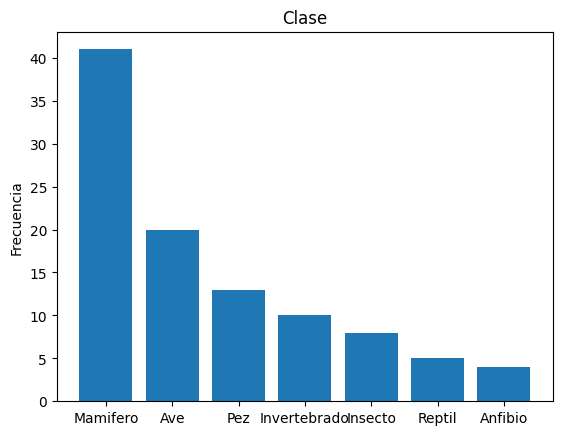

animal           object
Tiene_Pelo        int64
Tiene_Plumas      int64
Nace_de_huevo     int64
Toma_Leche        int64
Vuela             int64
Acuatico          int64
Depredador        int64
Dentado           int64
Vertebrado        int64
Respira           int64
Venenoso          int64
Tiene_Aletas      int64
Cant_Patas        int64
Tiene_Cola        int64
Domestico         int64
Tamano_Gato       int64
Clase            object
dtype: object

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Fuentes.ClassPerceptron import Perceptron

DATOS_DIR   = '../../Datos/'
data = pd.read_csv(DATOS_DIR + 'zoo.csv')

bars = data['Clase'].value_counts()
plt.figure()
N = len(bars)
plt.bar(np.arange( N ), bars)  # Gráfico de bars
plt.title('Clase')      # Colocamos el título
plt.ylabel('Frecuencia')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), bars.index)
plt.show()

data.dtypes


Puede observarse la disparidad de ejemplos de cada clase de animal. Esto puede provocar una falta de entrenamiento para las clases con menos ejemplos. El modelo tiende a predecir siempre la clase con más ejemplos, porque eso minimiza el error global, sin aprender nada.

### b)

Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.

In [83]:
def evaluar_perceptron_promedio_abs(data, clase, alpha=0.01, max_iter=200, n_repeticiones=100):
    X = np.array(data.iloc[:, 1:-1])
    T = (data["Clase"] == clase).astype(int)
    
    efectividades = []
    iteraciones = []
    pesos = []
    
    for _ in range(n_repeticiones):
        ppn = Perceptron(alpha=alpha, n_iter=max_iter, draw=False)
        ppn.fit(X, T)
        Y = ppn.predict(X)
        efectividades.append(100.0 * np.sum(Y == T) / len(T))
        iteraciones.append(len(ppn.errors_))
        pesos.append(ppn.w_)
    
    pesos_promedio = np.mean(np.array(pesos), axis=0)
    
    resultados = {
        "promedio_efectividad": np.mean(efectividades),
        "promedio_iteraciones": np.mean(iteraciones),
        "promedio_pesos_abs": np.abs(pesos_promedio)
    }
    
    print(f"Resultados para la clase '{clase}':")
    print(f"  Efectividad promedio: {resultados['promedio_efectividad']:.2f}%")
    print(f"  Iteraciones promedio: {resultados['promedio_iteraciones']:.2f}")
    print(f"  Pesos promedio en valor absoluto: {resultados['promedio_pesos_abs']}")
    
    return resultados

resultados_mamifero_abs = evaluar_perceptron_promedio_abs(data, clase="Mamifero", alpha=0.01, max_iter=200, n_repeticiones=100)


Resultados para la clase 'Mamifero':
  Efectividad promedio: 100.00%
  Iteraciones promedio: 12.07
  Pesos promedio en valor absoluto: [0.288158   0.12928013 0.32824766 0.32347123 0.10465224 0.04955868
 0.06914442 0.09490351 0.00258478 0.07823589 0.11857042 0.00256616
 0.03624324 0.02031417 0.01173541 0.16830034]


### c) 

Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y observe si las características más relevantes siguen siendo las mismas.

##### Análisis de pesos

Aquellos que son más grandes en módulo corresponden a características que permiten diferenciar mejor si es un mamífero o no, puesto que hacer más probable que la salida cambie de valor:
- **Tiene_pelo**
- **Nace_de_huevo**
- **Toma_leche**


Se analizó todo en módulo sobre varias iteraciones para saber aquellos pesos que más influían en la decisión de si es mamífero o no. Lo mismo haré con el resto de clases a analizar.

### d) 

Repita b) y c) para las aves.

In [85]:
resultados_aves_abs = evaluar_perceptron_promedio_abs(data, clase="Ave", alpha=0.01, max_iter=200, n_repeticiones=100)


Resultados para la clase 'Ave':
  Efectividad promedio: 100.00%
  Iteraciones promedio: 11.54
  Pesos promedio en valor absoluto: [0.10720552 0.36901734 0.02118224 0.10498722 0.19451542 0.0715898
 0.05434162 0.28729429 0.07745799 0.02124754 0.06646373 0.13620011
 0.08403305 0.09842232 0.02694036 0.03119658]


##### Análisis de pesos
- **Tiene_plumas**
- **Dentado**
- **Vuela**

### e)

Repita b) y c) para los reptiles.

In [86]:
resultados_reptiles_abs = evaluar_perceptron_promedio_abs(data, clase="Reptil", alpha=0.01, max_iter=200, n_repeticiones=100)

Resultados para la clase 'Reptil':
  Efectividad promedio: 100.00%
  Iteraciones promedio: 40.06
  Pesos promedio en valor absoluto: [0.21246277 0.2635401  0.0480157  0.23384371 0.17313415 0.25725488
 0.01984946 0.03898322 0.15950482 0.02568164 0.06123705 0.22999064
 0.03381575 0.20678257 0.09364571 0.0306212 ]


##### Análisis de pesos

- **Tiene_plumas**
- **Acuatico**
- **Toma_Leche**
- **Tiene_pelo**

En particular, se ve cómo los pesos se parecen más entre sí. No hay pesos que sean muchos mas influyentes que otros. No hay suficientes datos para que alguno sobresalga como muy influyente.